In [82]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import math
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
import seaborn as sns
from torch.utils.data import DataLoader,TensorDataset
from sklearn.metrics import confusion_matrix

# Extracting Data from Datasets

In [83]:
task2_train_img = pd.read_csv("./train_data.csv",header=None)
task2_train_label = pd.read_csv("./train_label.csv",header=None)

task2_test_img = pd.read_csv("./test_data.csv",header=None)
task2_test_label = pd.read_csv("./test_label.csv",header=None)

task2_val_img = pd.read_csv("./val_data.csv",header=None)
task2_val_label = pd.read_csv("./val_label.csv",header=None)

In [84]:
task2_train_img.shape

(2000, 36)

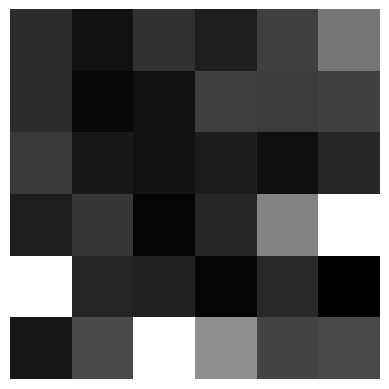

In [85]:
image_size = task2_train_img.shape[1]
img_1 = np.array(task2_train_img.iloc[1])
size = int(math.sqrt(img_1.shape[0]))

# Reshape the flattened array into a square image
sq_img = img_1.reshape((size,size))

# Display the image using Matplotlib
plt.imshow(sq_img,cmap='gray')
plt.axis('off')
plt.show()


In [86]:
task2_train_label.shape

(2000, 1)

In [87]:
print(f"The labels of the images are {task2_train_label.iloc[:,0].unique()}")

The labels of the images are [0. 1. 2. 3. 4.]


# The Neural Network

In [88]:
class Neural_Net(nn.Module):
    
    def __init__(self):
        super(Neural_Net,self).__init__()
        self.fc1 = nn.Linear(36,20) #i/p layer -----> h1 
        self.bn1 = nn.BatchNorm1d(20) #normalisation applied to hidden layer 2
        self.fc2 = nn.Linear(20,10) #h1 -----> h2
        self.bn2 = nn.BatchNorm1d(10) #normalisation applied to hidden layer 2
        self.fc3 = nn.Linear(10,5)  #h2 -----> o/p layer

    def forward(self,input):

        s1 = self.fc1(input)
        s1 = torch.tanh(s1)
        s1 = self.bn1(s1)

        s2 = self.fc2(s1)
        s2 = torch.tanh(s2)
        s2 = self.bn2(s2)

        s3 = self.fc3(s2)

        return s3

# Training our Network

In [89]:
# hyperparameters

loss_fn = nn.CrossEntropyLoss()
lr = 0.01
stopping_criteria = 10**(-5)
 

In [90]:
nn1 = Neural_Net()
optimiser = optim.Adam(nn1.parameters(),lr=lr)

In [91]:
train_data_tensor = torch.tensor(task2_train_img.values,dtype=torch.float32)
train_label_tensor = torch.tensor(task2_train_label.values,dtype=torch.long)
batch_size = 200

train_dataset = TensorDataset(train_data_tensor,train_label_tensor)
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)

print(train_data_tensor.shape)
print(train_label_tensor.shape)

torch.Size([2000, 36])
torch.Size([2000, 1])


In [92]:
for x_batch, y_batch in train_loader:
    print(x_batch.shape)  # Expected: torch.Size([100, 36])
    print(y_batch.shape)  # Expected: torch.Size([100,])
    break  # Just checking one batch


torch.Size([200, 36])
torch.Size([200, 1])


In [93]:
loss_arr = []
epochs = 0
prev_epoch_loss = 0
curr_epoch_loss = 10

change = abs(curr_epoch_loss - prev_epoch_loss)

while change>stopping_criteria:

    epoch_loss = 0
    # iterating through a mini batch
    for x_batch,y_batch in train_loader:

        y_batch = y_batch.squeeze()
        prediction = nn1(x_batch) #forward pass and loss for one mini batch
        loss = loss_fn(prediction,y_batch) # average NLE error for each mini batch

        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

        epoch_loss += loss.item() # convert average nle error for each mini batch to float and add it to the epoch loss

    curr_epoch_loss = epoch_loss/len(train_loader)
    loss_arr.append(curr_epoch_loss)
    change = abs(curr_epoch_loss-prev_epoch_loss)
    prev_epoch_loss = curr_epoch_loss

    epochs+=1

    if(epochs%5==0):
        print(f"Epoch{epochs},Loss:{loss_arr[-1]:.4f}")
    

Epoch5,Loss:1.0463
Epoch10,Loss:0.9982
Epoch15,Loss:0.9564
Epoch20,Loss:0.9244
Epoch25,Loss:0.8967
Epoch30,Loss:0.8777
Epoch35,Loss:0.8611
Epoch40,Loss:0.8386
Epoch45,Loss:0.8245
Epoch50,Loss:0.8059
Epoch55,Loss:0.8014
Epoch60,Loss:0.7773
Epoch65,Loss:0.7609
Epoch70,Loss:0.7452
Epoch75,Loss:0.7385
Epoch80,Loss:0.7263
Epoch85,Loss:0.7160
Epoch90,Loss:0.6885
Epoch95,Loss:0.6879
Epoch100,Loss:0.6911
Epoch105,Loss:0.6691
Epoch110,Loss:0.6945
Epoch115,Loss:0.6477
Epoch120,Loss:0.6547
Epoch125,Loss:0.6348
Epoch130,Loss:0.6533
Epoch135,Loss:0.6371
Epoch140,Loss:0.6074
Epoch145,Loss:0.6238
Epoch150,Loss:0.6166
Epoch155,Loss:0.6009
Epoch160,Loss:0.6050
Epoch165,Loss:0.6000
Epoch170,Loss:0.6024
Epoch175,Loss:0.5849
Epoch180,Loss:0.5980
Epoch185,Loss:0.6047
Epoch190,Loss:0.5836
Epoch195,Loss:0.5903
Epoch200,Loss:0.5859
Epoch205,Loss:0.5581
Epoch210,Loss:0.5749
Epoch215,Loss:0.5705
Epoch220,Loss:0.5554
Epoch225,Loss:0.5833
Epoch230,Loss:0.5900
Epoch235,Loss:0.5737
Epoch240,Loss:0.5569
Epoch245,Los

In [94]:
print(f"{epochs} number of epochs were taken")
print(f"Final loss was {curr_epoch_loss}")

6374 number of epochs were taken
Final loss was 0.3676427185535431


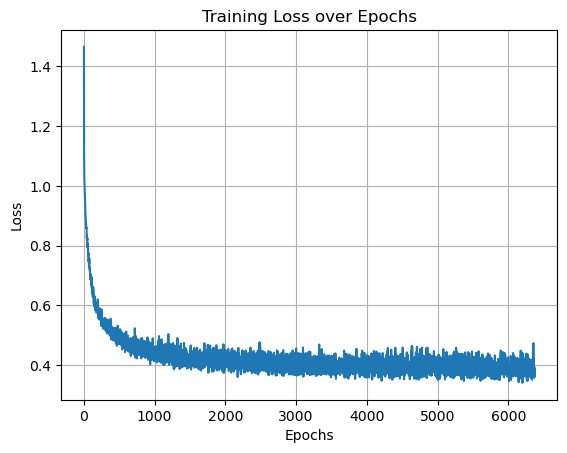

In [95]:
plt.plot(list(range(1,epochs+1)),loss_arr,linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()